## Семинар 5. Корреляция.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
from scipy.stats import spearmanr, pearsonr, kendalltau

#### Пример 1.

In [3]:
example = pd.read_csv("Example1.txt")
x = example['x']
y = example['y']
#Изучим вопрос о независимости (некоррелируемости) признаков x и y

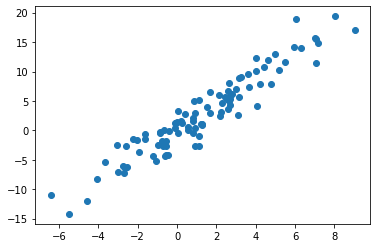

In [4]:
#Изобразим точки (x_i, y_i) на плоскости:
plt.scatter(x,y);

Наблюдаем что-то похожее на линейную зависимость

In [5]:
#Проверим данные x и y на нормальность (помним, что для использования коэффициента корреляции Пирсона 
#нормальное распределение данных является желательным условием):
st.shapiro(x)

ShapiroResult(statistic=0.9915743470191956, pvalue=0.7896034121513367)

In [6]:
st.shapiro(y)

ShapiroResult(statistic=0.9872850179672241, pvalue=0.45707398653030396)

Тест Шапиро-Уилка нормальность данных не отвергает

In [7]:
#Коэффициент корреляции Пирсона
pearsonr(x, y)
#В качестве результата имеем значение выборочного коэффициента корреляции и p-value (Гипотеза состоит в том, 
#что признаки независимы (некоррелируемы))

(0.9512612478332824, 7.207182640593525e-52)

Коэффициент корреляции близок к 1, p-value очень маленькое, есть линейная зависимость (помним, что 
коэффициент корреляции Пирсона хорошо "ловит" именно линейную зависимость)

In [ ]:
#Если хотим получить только коэффициент корреляции, то пишем так:
pearsonr(x, y)[0]

In [ ]:
#Если хотим получить только p-value, то пишем так:
pearsonr(x, y)[1]

In [8]:
#Можно посчитать вручную значение коэффициента корреляции Пирсона:
r = (np.mean(x*y) - np.mean(x)*np.mean(y))/(np.std(x) * np.std(y))
r

0.9512612478332824

In [9]:
#Можно посчитать вручную и p-value:
from scipy.stats import t
n=len(x)
t_stat = (r * np.sqrt(n-2)) / np.sqrt(1 - r**2)
p_value = 2*np.min([t.cdf(t_stat, n-2), 1 - t.cdf(t_stat, n-2)])
p_value

0.0

In [10]:
#Коэффициент корреляции Спирмена
spearmanr(x, y)
#В качестве результата снова имеем значение коэффициента корреляции и p-value (Гипотеза состоит в том, 
#что признаки независимы)

SpearmanrResult(correlation=0.9365976597659765, pvalue=2.0005532643898256e-46)

Коэффициент корреляции близок к 1, p-value очень маленькое, есть зависимость (помним, что 
коэффициент корреляции Спирмена хорошо "ловит" монотонные зависимости)

In [11]:
#Если хотим получить только коэффициент корреляции, то пишем так:
spearmanr(x, y).correlation

0.9365976597659765

In [12]:
#или
spearmanr(x, y)[0]

0.9365976597659765

In [13]:
#Если хотим получить только p-value, то пишем так:
spearmanr(x, y).pvalue

2.0005532643898256e-46

In [14]:
#или
spearmanr(x, y)[1]

2.0005532643898256e-46

In [15]:
#Коэффициент корреляции Кендалла
kendalltau(x, y)
#В качестве результата снова имеем значение коэффициента корреляции и p-value (Гипотеза состоит в том, 
#что признаки независимы)

KendalltauResult(correlation=0.7927272727272728, pvalue=1.5006980934612898e-31)

Коэффициент корреляции близок к 1, p-value очень маленькое, есть зависимость (помним, что 
коэффициент корреляции Кендалла хорошо "ловит" монотонные зависимости)

In [16]:
#Если хотим получить только коэффициент корреляции, то пишем так:
kendalltau(x, y).correlation

0.7927272727272728

In [17]:
#или
kendalltau(x, y)[0]

0.7927272727272728

In [18]:
#Если хотим получить только p-value, то пишем так:
kendalltau(x, y).pvalue

1.5006980934612898e-31

In [19]:
#или
kendalltau(x, y)[1]

1.5006980934612898e-31

#### Пример 2.

In [20]:
example = pd.read_csv("Example2.txt")
x = example['x']
y = example['y']

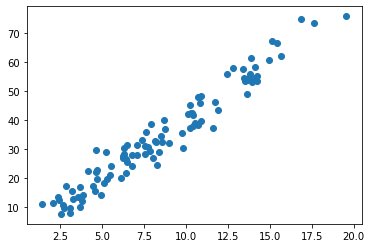

In [21]:
plt.scatter(x,y);

In [23]:
st.shapiro(x)

ShapiroResult(statistic=0.9660989046096802, pvalue=0.011206465773284435)

In [22]:
st.shapiro(y)

ShapiroResult(statistic=0.9621120691299438, pvalue=0.005703975446522236)

На уровне значимости 5% тест Шапиро-Уилка отвергает предположение о нормальности x и y

In [24]:
#Коэффициент корреляции Пирсона
pearsonr(x, y)

(0.9724808340536131, 8.2194748957584e-64)

Коэффициент корреляции близок к 1, наблюдается линейная зависимость.

Коэффициент корреляции Пирсона хорошо в этом примере "увидел" линейную зависимость, но в целом, если распределение выборок не является близким к нормальному, то лучше пользоваться ранговыми коэффициентами корреляции (Спирмена и Кендалла)

In [25]:
#Коэффициент корреляции Спирмена
spearmanr(x, y)

SpearmanrResult(correlation=0.9652205220522052, pvalue=6.6413700513890945e-59)

In [26]:
#Коэффициент корреляции Кендалла
kendalltau(x, y)

KendalltauResult(correlation=0.8375757575757578, pvalue=5.039118950891044e-35)

Вывод: гипотеза о независимости признаков x и y отвергается

#### Пример 3.

In [27]:
example = pd.read_csv("Example3.txt")
x = example['x']
y = example['y']

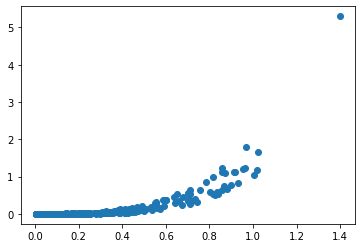

In [28]:
plt.scatter(x,y);

In [29]:
st.shapiro(x)

ShapiroResult(statistic=0.892939567565918, pvalue=1.0639158011613997e-13)

In [30]:
st.shapiro(y)

ShapiroResult(statistic=0.3658123016357422, pvalue=5.458846712535019e-31)

На уровне значимости 5% тест Шапиро-Уилка отвергает предположение о нормальности x и y.
При этом, судя по картинке, зависимость не линейная.

In [31]:
#Коэффициент корреляции Пирсона
pearsonr(x, y)

(0.7234426222984888, 7.126634876225565e-50)

Коэффициент корреляции Пирсона уже не так близок к 1, как в предыдущих примерах (сейчас 0.72, а в примерах 1 и 2 было 0.95 и 0.97). Судя по графику, зависимость не линейная, выборки не нормальные, поэтому лучше ориентироваться на ранговые коэффициенты корреляции.

In [32]:
#Коэффициент корреляции Спирмена
spearmanr(x, y)

SpearmanrResult(correlation=0.955071945243836, pvalue=1.9618496634822895e-159)

In [33]:
#Коэффициент корреляции Кендалла
kendalltau(x, y)

KendalltauResult(correlation=0.8201560758082497, pvalue=1.3230473854801313e-99)

Вывод: гипотеза о независимости признаков x и y отвергается

#### Пример 4 (неустойчивость коэффициента корреляции Пирсона к выбросам).

In [34]:
#Сами создадим выборки для иллюстративного примера
x = np.linspace(0,1, 100)
y = x*2+3

In [35]:
#Идеальная линейная зависимость, все коэффициенты корреляции близки к 1
print ("pearsonr:", pearsonr(x, y)[0])
print ("spearmanr:", spearmanr(x, y).correlation)
print ("kendalltau:", kendalltau(x, y).correlation)

pearsonr: 1.0
spearmanr: 0.9999999999999999
kendalltau: 1.0


In [36]:
x = np.append(x, 10) #добавляем выброс

In [37]:
y = np.append(y, 5) #добавляем выброс

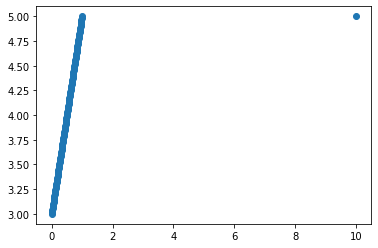

In [38]:
plt.scatter(x,y);

In [39]:
print ("pearsonr:", pearsonr(x, y)[0])
print ("spearmanr:", spearmanr(x, y).correlation)
print ("kendalltau:", kendalltau(x, y).correlation)

pearsonr: 0.45127805006226285
spearmanr: 0.9999970879398483
kendalltau: 0.9999009851970445


Коэффициент корреляции Пирсона перестал быть близким к 1 (в отличие от ранговых коэффициентов корреляции Спирмена и Кендалла)

#### Пример 5.

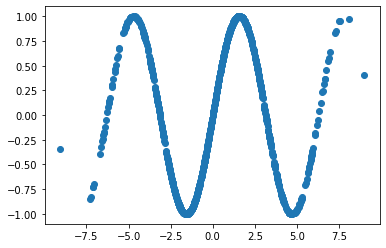

In [40]:
#Сами создадим выборки для иллюстративного примера
x = st.norm.rvs(size=1000, loc = 0, scale = 3)
y = np.sin(x)
plt.scatter(x,y);

In [41]:
print ("pearsonr:", pearsonr(x, y)[0])
print ("spearmanr:", spearmanr(x, y).correlation)
print ("kendalltau:", kendalltau(x, y).correlation)

pearsonr: 0.03792676398997584
spearmanr: 0.12785903585903588
kendalltau: 0.10808808808808809


Вывод: все три коэффициента корреляции не "ловят" немонотонные зависимости.

###  Частная корреляция

In [42]:
#Сами создадим выборки для иллюстративного примера
z = st.norm.rvs(size=1000, loc=0, scale=4) 
x = z + st.norm.rvs(size=1000, loc=3, scale=1)
y = z + st.norm.rvs(size=1000, loc=-2, scale=1)
#Видим: зависимость признаков x и y основывается только на зависимости их обоих от z

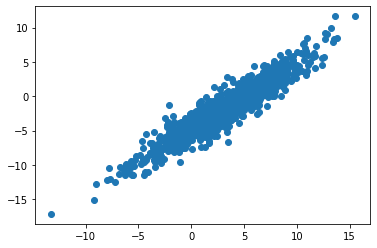

In [43]:
plt.scatter(x,y);

In [44]:
st.shapiro(x)

ShapiroResult(statistic=0.9980185031890869, pvalue=0.29045701026916504)

In [45]:
st.shapiro(y)

ShapiroResult(statistic=0.9980741143226624, pvalue=0.3150695562362671)

In [46]:
pearsonr(x, y)

(0.9383391275454763, 0.0)

In [47]:
spearmanr(x, y)

SpearmanrResult(correlation=0.9273875913875915, pvalue=0.0)

In [48]:
kendalltau(x, y)

KendalltauResult(correlation=0.76994994994995, pvalue=5.1150317498677574e-291)

Все признаки корреляции подтверждают наличие зависимости между x и y

Хотим теперь оценить величину зависимости x и y без учета влияния z c помощью частной корреляции.

In [49]:
#Создаем функцию, считающую частную корреляцию:
def partial_corr(x, y, z, method='pearson'):
    if method == 'pearson':
        r_xy, r_xz, r_yz = pearsonr(x, y)[0], pearsonr(x, z)[0], pearsonr(y, z)[0]
    elif method == 'kendall':
        r_xy, r_xz, r_yz = kendalltau(x, y).correlation, kendalltau(x, z).correlation, kendalltau(y, z).correlation
    else:
        return None
    
    return (r_xy - r_xz * r_yz) / np.sqrt((1 - r_xz ** 2) * (1 - r_yz ** 2))

In [50]:
print ("pearson partial correlation:", partial_corr(x, y, z, method='pearson'))

pearson partial correlation: 0.0027906479442822685


Частный коэффициент корреляции x и y без учета влияния z оказался близким к 0.

### Таблицы сопряженности

Задача 

Программные продукты оцениваются по шкале от 1 до 4 по качеству, и кроме того, имеется два способа написания программных продуктов: быстрый и медленный. Известно, что среди быстро написанных программных продуктов оценку 1 имеют 120 продуктов, оценку 2 – 124 продукта, 3 — 133 продукта, 4 – 106 продуктов. Среди медленно написанных продуктов оценку 1 имеют 97, 2 – 142, 3 – 129 и 4 – 149 продуктов. Выяснить, имеется ли статистически значимая связь между скоростью написания программных продуктов и их качеством (на уровне значимости 1% и на уровне значимости 3%).

In [12]:
#Создаем таблицу сопряженности:
table = np.array([[120, 124, 133, 106],
[97, 142, 129, 149]])
#Хотим изучить вопрос о независимости признаков "тип написания продукта" и "скорость написания продукта" 

In [13]:
#Применяем критерий:
st.chi2_contingency(table)
#В качестве первых двух результатов получаем значение статистики критерия и p-value

(9.823237888661364,
 0.02013001111621603,
 3,
 array([[104.811, 128.478, 126.546, 123.165],
        [112.189, 137.522, 135.454, 131.835]]))

In [14]:
#Если хотим только p-value, то пишем так:
st.chi2_contingency(table)[1]

0.02013001111621603

Гипотеза состоит в том, что признаки независимы. Итого на уровне значимости 1% гипотеза о независимости признаков не отвергается, а на уровне значимости 3% гипотеза о независимости признаков отвергается.

### Проверка независимости двух признаков с помощью таблиц сопряженности

In [15]:
Star = pd.read_csv("Star.csv")
x = Star['x']
y = Star['y']

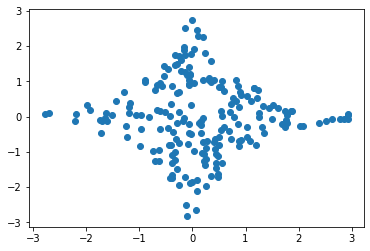

In [16]:
plt.scatter(x, y);

Судя по изображению, некоторая зависимость x и y есть. Найдем все три коэффицента корреляции.

In [17]:
pearsonr(x, y)

(-0.025961027346907174, 0.7151826143471101)

In [18]:
spearmanr(x, y)

SpearmanrResult(correlation=-0.04081752043801095, pvalue=0.5660571738070647)

In [19]:
kendalltau(x, y)

KendalltauResult(correlation=-0.019597989949748745, pvalue=0.6802458220697412)

Согласно значениям всех трех коэффициентов корреляции, зависимость отсутствует.

Попробуем теперь проверить гипотезу о независимости с помощью таблиц сопряженности.

Разбиваем ось ox на промежутки точками -np.inf, -0.5, 0.5, np.inf

Разбиваем ось oy на промежутки точками -np.inf, -0.5, 0.5, np.inf

In [20]:
#Добавляем в Star новый столбец 'x_bin', в котором для каждого значения из столбца 'х' указано, 
#в каком промежутке оно содержится:
Star['x_bin'] = pd.cut(x, [-np.inf, -0.5, 0.5, np.inf])
#Добавляем в Star новый столбец 'y_bin', в котором для каждого значения из столбца 'y' указано, 
#в каком промежутке оно содержится:
Star['y_bin'] = pd.cut(y, [-np.inf, -0.5, 0.5, np.inf])

In [21]:
Star

,x,y,x_bin,y_bin
0,-0.970972,0.050214,"(-inf, -0.5]","(-0.5, 0.5]"
1,-0.696865,0.752624,"(-inf, -0.5]","(0.5, inf]"
2,1.218057,0.539155,"(0.5, inf]","(0.5, inf]"
3,1.509003,0.314469,"(0.5, inf]","(-0.5, 0.5]"
4,0.494606,-0.588871,"(-0.5, 0.5]","(-inf, -0.5]"
...,...,...,...,...
195,1.777160,0.054557,"(0.5, inf]","(-0.5, 0.5]"
196,-0.324787,-0.993537,"(-0.5, 0.5]","(-inf, -0.5]"
197,0.078561,2.443968,"(-0.5, 0.5]","(0.5, inf]"
198,1.033270,-0.574604,"(0.5, inf]","(-inf, -0.5]"


In [22]:
#Создаем сводную таблицу:
table2 = Star.pivot_table(values='x', index='x_bin', columns='y_bin', aggfunc='count', fill_value=0)
#fill_value=0: ставим 0, если в какой-то промежуток не попало ни одного значения

In [23]:
table2

y_bin,"(-inf, -0.5]","(-0.5, 0.5]","(0.5, inf]"
x_bin,,,
"(-inf, -0.5]",6,26,9
"(-0.5, 0.5]",45,16,36
"(0.5, inf]",8,40,14


In [24]:
#Применяем к получившейся таблице тест:
res = st.chi2_contingency(table2)
res

(49.54058453424397, 4.5031674582895365e-10, 4, array([[12.095, 16.81 , 12.095],
        [28.615, 39.77 , 28.615],
        [18.29 , 25.42 , 18.29 ]]))

In [25]:
p_value = res[1]
p_value 

4.5031674582895365e-10

Вывод: признаки x и y зависимы!